## Ejercicio 1: Reducción de dimensionalidad ##

Es este ejercicio vamos a trabajar con los datasets que ya usamos anteiormente de medidas de personas del ejército de EEUU `ansurMen.csv` y `ansurMen.csv`.

**a)** Carguen los dos csvs en dos dataframes distintos de pandas. Agréguenle a cada uno una nueva columna 'SEXO' que tenga los valores 'H' y 'M', según corresponda, para poder identificar de qué dataset vino cada persona. Luego unan los dos datasets en uno nuevo usando la función de pandas `pd.concat([df1, df2])`.

In [ ]:
# SI VAMOS A TRABAJAR CON LOS ARCHIVOS EN EL GOOGLE DRIVE, EJECUTAMOS ESTA CELDA

# Primero vamos a decirle a Colab que vamos a trabajar en el drive, o sea, que queremos montar el drive. 
# Luego vamos a cambiar de directorio en el cual queremos que el archivo que vamos a grabar se guarde.

# Montamos el Drive:
from google.colab import drive
drive.mount('/content/drive')
#
import os
# vamos al directorio Colab Notebooks/Data que es donde por convención decidimos guardar los datos
os.chdir('/content/drive/MyDrive/Colab Notebooks/Data/')

In [ ]:
os.chdir('/content/drive/MyDrive/argentinaprograma/Archivos_Datos/')

In [ ]:
import pandas as pd

# Cargo los dos datasets en dos Dataframes distintos
hombres = pd.read_csv('ansurMen.csv')
mujeres = pd.read_csv('ansurWomen.csv')

# Les agrego la nueva columna de 'SEXO'
hombres['SEXO'] = 'H'
mujeres['SEXO'] = 'M'

In [ ]:
# Ahora armo un único DataFrame combinando los dos anteriores
personas = pd.concat([hombres, mujeres])

**b)** Definan un nuevo dataframe de variables sólo numéricas a partir del anterior, descartando las columnas 'SEXO' y 'SUBJECT_NUMBER' (¿tiene sentido quedarse con esta última columna?). Luego apliquenle el `StandardScaler` de `sklearn` a este nuevo dataframe, y hagan una reducción dimensional usando PCA. ¿Con cuántas componentes necesito quedarme para explicar el 95% de la varianza de los datos?

In [ ]:
# Armo el dataset numérico descartando la columa de 'SEXO'. También descarto la 
# columna de 'SUBJECT_NUMBER' (número de sujeto), que en principio es un número
# identificador de cada sujeto que no aporta información (asumiendo que fueron
# numerados aleatoriamente).
personas_num = personas.drop(columns=['SEXO','SUBJECT_NUMBER'])

In [ ]:
from sklearn.preprocessing import StandardScaler

# Instanciar el rescalanador y rescalar los datos
scaler = StandardScaler()
personas_num_scaled = scaler.fit_transform(personas_num)

In [ ]:
from sklearn.decomposition import PCA

# Para ver cuántas componentes principales necesito, hago un PCA sin especificar
# dimensiones, y luego veo el número necesario para llegar a 0.95 de varianza
pca = PCA(n_components = ?) # n_components: número de componentes con las que nos quedamos
X_pca = pca.fit_transform(X_)

In [ ]:
from sklearn.decomposition import PCA

# Para ver cuántas componentes principales necesito, hago un PCA sin especificar
# dimensiones, y luego veo el número necesario para llegar a 0.95 de varianza
pca = PCA() # n_components: número de componentes con las que nos quedamos
personas_num_pca = pca.fit_transform(personas_num_scaled)

Con 34 componentes, preservamos el 0.95 de la varianza.


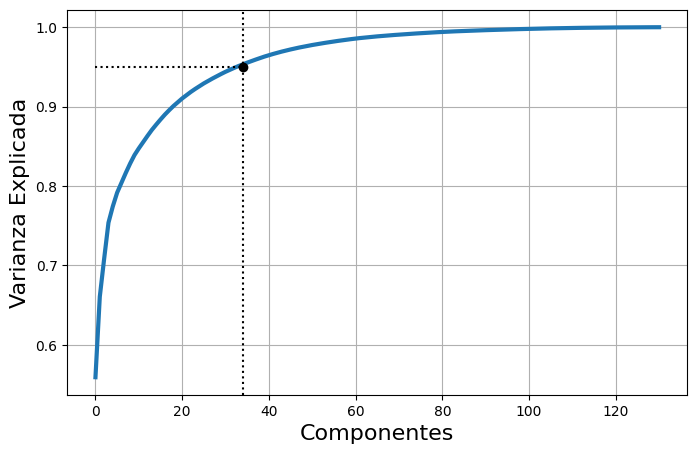

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Usando lo mismo de la clase:

# Definir qué fracción de la varianza se quiere mantener
var_frac = 0.95

# Calcular la suma cumulativa y hacer su gráfica
cumsum = np.cumsum(pca.explained_variance_ratio_) 
# eso nos dice cuanta información es retenida si paramos en cada dimensión

# En qué momento la suma cumulativa llega a var_frac * 100 %?
d = np.argmax(cumsum >= var_frac) + 1
print('Con {} componentes, preservamos el {} de la varianza.'.format(d, var_frac))

plt.figure(figsize=(8,5))
plt.plot(cumsum, linewidth=3)
# plt.axis([0, 400, 0, 1])

plt.axvline(d, color="k", ls=":")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")

plt.xlabel("Componentes", fontsize=16)
plt.ylabel("Varianza Explicada", fontsize=16)

plt.grid(True)

**c)** Ahora hagan otro PCA, pero quedándose sólo con 2 componentes, y hagan un scatterplot de los datos. ¿Qué es lo que se ve? Traten de pintar los puntos usando la columna categórica "SEXO" que tiene el dataset original.  

In [ ]:
# Hago un PCA a 2d

pca_2d = PCA(n_components=2) # n_components: número de componentes con las que nos quedamos
personas_pca2d = pca_2d.fit_transform(personas_num_scaled)

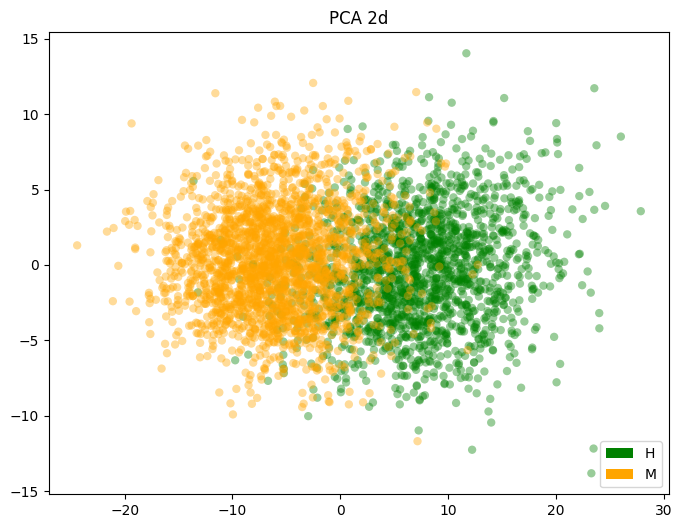

In [ ]:
# Grafico los resultados

# Para pintar según el sexo, defino los siguientes colores
colores = {'H':'g', 'M':'orange'}

# Ahora sí, el scatterplot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
scat = ax.scatter(*personas_pca2d.T, c=personas['SEXO'].map(colores), 
                  edgecolors='None', alpha=0.4)
plt.title('PCA 2d')

# Hago una pequeña leyenda manual de los colores
import matplotlib.patches as mpatches

leyenda = []
clase = []
for sexo, color in colores.items():
    clase.append(sexo)
    leyenda.append(mpatches.Rectangle((0,0),1,1,fc=color))
plt.legend(leyenda, clase, loc=4)

**d) (Opcional)**. Ahora hagan un PCA con un número reducido de componentes (digamos 8), y luego apliquen un TSNE con 2 componentes. Grafiquen los resultados cómo hicieron en el punto anterior. ¿Qué se ve ahora? Pueden jugar con el número de componentes del PCA, o sólo hacer TSNE, y ver las diferencias.  

In [ ]:
# Ahora hago PCA quedándome con 8 componentes
pca_8d = PCA(n_components=8) # n_components: número de componentes con las que nos quedamos
personas_pca8d = pca_8d.fit_transform(personas_num_scaled)

In [ ]:
from sklearn.manifold import TSNE

# Hago tsne a 2 dimensiones (tarda un ratito)
tsne = TSNE(n_components=2, random_state=42)
reduced_tsne = tsne.fit_transform(personas_pca8d) 

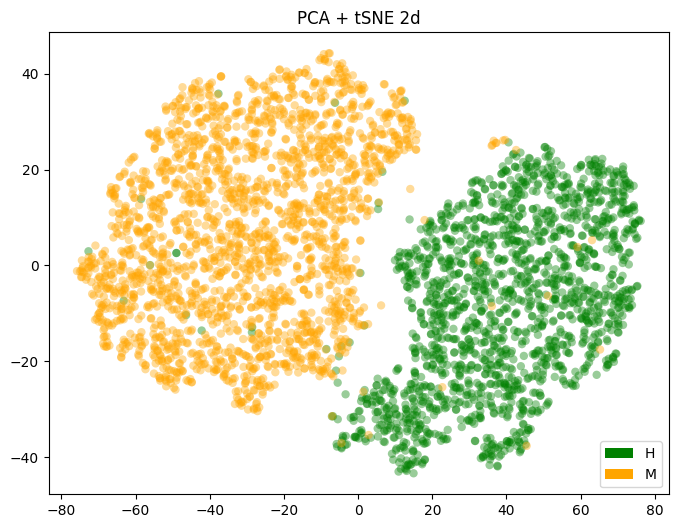

In [ ]:
# Grafico los nuevos resultados

# Para pintar según el sexo, defino los siguientes colores
colores = {'H':'g', 'M':'orange'}

# Ahora sí, el scatterplot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
scat = ax.scatter(*reduced_tsne.T, c=personas['SEXO'].map(colores), 
                  edgecolors='None', alpha=0.4)
plt.title('PCA + tSNE 2d')

# Hago una pequeña leyenda manual de los colores
import matplotlib.patches as mpatches

leyenda = []
clase = []
for sexo, color in colores.items():
    clase.append(sexo)
    leyenda.append(mpatches.Rectangle((0,0),1,1,fc=color))
plt.legend(leyenda, clase, loc=4)

## Ejercicio 2: Preprocesado ##

En este ejercico vamos a trabajar con un dataset bastante problemático: el dataset de arbolado en calles de CABA, [arbolado-publico-lineal-2017-2018.csv](https://drive.google.com/file/d/1tCbEg1Yy0xgmY5e3hMgbOGYEiJ9Ffw8P/view?usp=sharing) (extraído de [aquí](https://data.buenosaires.gob.ar/dataset/arbolado-publico-lineal)). El mismo el similar al de árboles en parques que ya hemos usado, pero tiene bastantes más registros.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**a) Cargando los datos**. Importen este nuevo dataset usando pandas. Van a notar que les da una advertencia (*warning*) porque hay algunas columnas con tipos mezclados. Por ahora ignorenlo. 

Para ahorrarnos trabajo, definan un nuevo DataFrame usando solo las columnas `['nro_registro', 'nombre_cientifico', 'estado_plantera', 'ubicacion_plantera', 'nivel_plantera', 'diametro_altura_pecho', 'altura_arbol']`.

In [2]:
import pandas as pd

# Cargo el dataset
arboles = pd.read_csv('/content/drive/MyDrive/ArgentinaPrograma/Módulo2/Material/Semana 3/arbolado-publico-lineal-2017-2018.csv')

# Elijo solo las columnas pedidas
columnas = ['nro_registro', 'nombre_cientifico', 'estado_plantera', 'ubicacion_plantera', 'nivel_plantera', 'diametro_altura_pecho', 'altura_arbol']
arboles = arboles[columnas]

<ipython-input-2-423e8a65c79c>:4: DtypeWarning: Columns (2,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  arboles = pd.read_csv('/content/drive/MyDrive/ArgentinaPrograma/Módulo2/Material/Semana 3/arbolado-publico-lineal-2017-2018.csv')


In [3]:
# Veamos un poco el dataset:
arboles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370180 entries, 0 to 370179
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   nro_registro           370180 non-null  object 
 1   nombre_cientifico      370180 non-null  object 
 2   estado_plantera        370180 non-null  object 
 3   ubicacion_plantera     368776 non-null  object 
 4   nivel_plantera         368828 non-null  object 
 5   diametro_altura_pecho  369894 non-null  float64
 6   altura_arbol           365858 non-null  float64
dtypes: float64(2), object(5)
memory usage: 19.8+ MB


**b) Limpieza de datos (I)**. Analicen los valores únicos que pueden tomar las columnas 'estado_plantera', 'ubicacion_plantera' y 'nivel_plantera'. ¿Qué es lo que ven?

Para las tres columnas, unifiquen los valores que pertecen a una misma catgoría.

In [ ]:
# Veamos los valores únicos de 'estado_plantera'
arboles.estado_plantera.unique()

array(['Ocupada', 'Sobreocupada', 'Subocupada', 'Vacía', 'Ocupada ',
       'Cerrada', 'Parcialmente cerrada', 'SobreOcupada', 'ocupada',
       'sobreocupada', 'Sobreocupada parc. cerrada', 'Cantero ocupado'],
      dtype=object)

In [ ]:
# Veamos los valores únicos de 'ubicacion_plantera'
arboles.ubicacion_plantera.unique()

array(['Regular', nan, 'Fuera de línea', 'Ochava', 'Regular ', 'regular',
       'Fuera Línea,Ochava', 'Cantero Grande', 'Ocupada', 'o', 'Elevada',
       'O', 'Och', 'Ochva', 'Ochava/Fuera Línea', 'Subocupada', 'ochava',
       'Fuera Nivel', 'Sobreocupada', 'Fuera de Línea, Ochava',
       'Fuera Línea/Ochava'], dtype=object)

In [ ]:
# Veamos los valores únicos de 'nivel_plantera'
arboles.nivel_plantera.unique()

array(['A nivel', 'Elevada', 'Bajo nivel', nan, 'A Nivel', 'Bajo Nivel',
       'AN', 'EL', 'Elevado', 'a Nivel', 'elevada', 'el', 'A nivel ',
       'Reducida', 'Bajo Bivel', 'Eleveda',
       'obs: no tiene plantera definida', 'BN', 'Regular', 'bajo nivel',
       'A  Nivel', 'Bajo  nivel', 'Ochava', 'Elevadas', 'Baja Nivel',
       'An', 'ELEVADA'], dtype=object)

In [ ]:
# Hay muchas categorías que son lo mismo, pero están escrito distinto. Para
# corregirlo, hagamos unos diccionarios que nos indiquén por qué valor habría
# que reemplazarlos:

# ESTADO
dic_estado = {'ocupada':'Ocupada', 'Ocupada ':'Ocupada', 
              'SobreOcupada':'Sobreocupada', 'sobreocupada':'Sobreocupada'}
# reemplazo:
for clave, valor in dic_estado.items():
  arboles.estado_plantera.replace(clave, valor, inplace=True)


# UBICACION
dic_ubicacion = {'regular':'Regular', 'Regular ':'Regular',
              'o':'O', # No sabemos si 'o' es ochava u ocupada 
              'Och':'Ochava', 'ochava':'Ochava', 'Ochva':'Ochava',
              'Fuera Línea,Ochava':'Ochava/Fuera Línea',
              'Fuera de Línea, Ochava':'Ochava/Fuera Línea',
              'Fuera Línea/Ochava':'Ochava/Fuera Línea'}
# reemplazo:
for clave, valor in dic_ubicacion.items():
  arboles.ubicacion_plantera.replace(clave, valor, inplace=True)


# NIVEL
dic_nivel = {'A  Nivel':'A Nivel', 'a Nivel':'A Nivel', 'A nivel':'A Nivel', 
             'A nivel ':'A Nivel', 'An':'A Nivel', 'AN':'A Nivel',
             'Baja Nivel':'Bajo Nivel', 'Bajo  nivel':'Bajo Nivel', 
             'Bajo Bivel':'Bajo Nivel', 'bajo nivel':'Bajo Nivel', 
             'Bajo nivel':'Bajo Nivel', 'BN':'Bajo Nivel', 'el':'Elevada', 
             'EL':'Elevada', 'elevada':'Elevada', 'ELEVADA':'Elevada', 
             'Elevadas':'Elevada', 'Elevado':'Elevada', 'Eleveda':'Elevada'}
# reemplazo:
for clave, valor in dic_nivel.items():
  arboles.nivel_plantera.replace(clave, valor, inplace=True)

In [ ]:
# Nota: algunas categorías probablemente sean errores y podrían ser descartadas,
# como por ejemplo 'obs: no tiene plantera definida', 'Regular' y 'Ochava' en la
# columna nivel_plantera, ya que si miran hay un sólo registro de cada una.   

**c) Limpieza de datos (II)**. Hagan histogramas de los valores de las variables 'diametro_altura_pecho' y 'altura_arbol'.

A primera vista no parece haber nada raro, pero fijense que para el diámetro (que está medido en cm) hay muchos datos con valor 0 (pueden usar el método `value_counts()`). Si bien podría haber árboles con menos de 1 cm de diámetro, la cantidad de los mismos nos hace sospechar que en gran parte de los casos se trata de un error.

Eliminen las filas con diámetro 0, o al menos por ahora reemplacen el valor por `nan`.

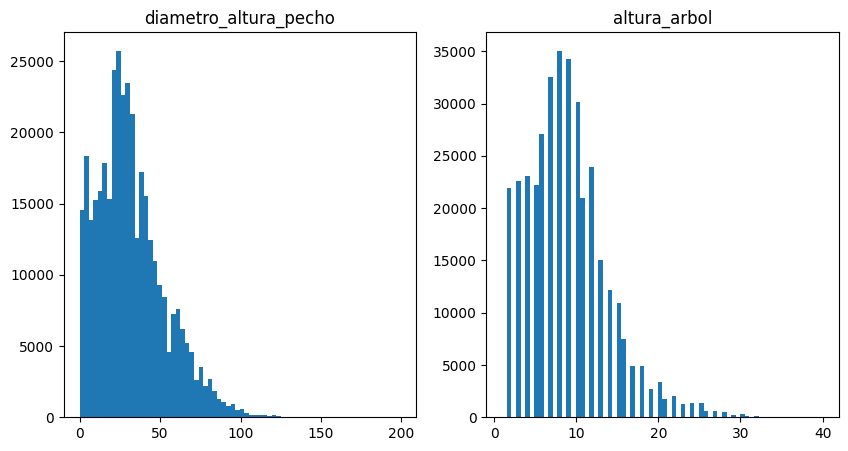

In [ ]:
import numpy as np

df = arboles

# Hacer histogramas de las feautures en `df`
columns = ['diametro_altura_pecho', 'altura_arbol']

N_col = 2
N_rows = 1

fig, ax = plt.subplots(N_rows,N_col, figsize=(5*N_col,5*N_rows))

for i in range(N_col):
        ax[i].hist(df[columns[i*N_rows]], bins=70)
        ax[i].set_title(columns[i*N_rows])

In [ ]:
# Veo cuantos arboles con 0 hay:
print('N arboles diam 0:', arboles.diametro_altura_pecho.value_counts()[0.])
print('N arboles diam 1:', arboles.diametro_altura_pecho.value_counts()[1.])

N arboles diam 0: 6378
N arboles diam 1: 2819


In [ ]:
# Por las dudas reemplacemos por Nan:
arboles.diametro_altura_pecho.replace(0., np.nan, inplace=True)

**d) Datos faltantes**. Analicen la cantidad de datos faltantes en cada columna y decidan qué hacer con ellos (descartarlos, crear una nueva categoría en las variables categóricas, reemplazarla por promedio/mediana en las numéricas, etc.)

In [ ]:
# Veamos un resumen de los datos faltantes:
arboles.isna().sum()

nro_registro                0
nombre_cientifico           0
estado_plantera             0
ubicacion_plantera       1404
nivel_plantera           1352
diametro_altura_pecho    6664
altura_arbol             4322
dtype: int64

In [ ]:
# La verdad es que con 370000 datos que tiene el dataset, perder un pocos miles
# no es un problema:

arboles_limpio = arboles.dropna()

In [ ]:
# Pero si quisiésemos imputar los datos numéricos, lo hacemos de la siguiente manera:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median') # Uso la mediana

# Para usar este SimpleImputer, tenemos que dejar de lado las variables categóricas,
# ya que sólo funciona con variables numéricas.
# ADVERTENCIA: La columna 'nro_registro' esta importada como string porque hay
# algún error, así que la tenemos que sacar para que funcione:
columnas_categoricas = ['nombre_cientifico', 'estado_plantera', 
                        'ubicacion_plantera', 'nivel_plantera', 'nro_registro']
arboles_limpio_num = imputer.fit_transform(arboles.drop(columnas_categoricas, axis=1))

In [ ]:
# Para las variables categóricas, podemos crear una nueva categoría que sea
# "sin datos" (S/D), o "datos faltantes":

columnas_categoricas = ['nombre_cientifico', 'estado_plantera', 
                        'ubicacion_plantera', 'nivel_plantera']

arboles_limpio_cat = arboles[columnas_categoricas].fillna('S/D')

In [ ]:
# Veamos un ejemplo de cómo quedó
arboles_limpio_cat.ubicacion_plantera.value_counts() 

**e) Variables categóricas**. Apliquen el método de One-Hot Encoding a alguna de las variables categóricas del dataset. ¿De qué va a depender la cantidad de componentes de los vectores resultantes?

In [ ]:
# Usemos el OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Instanciamos el codificador
cat_encoder = OneHotEncoder()

# Ajustamos a la data categorica de ubicacion_plantera
# OJO que el OneHotEncoder espera recibir un dataframe, no una sola columna,
# por eso el doble paréntesis abajo
cat_encoder.fit(arboles_limpio_cat[['ubicacion_plantera']])

#lo usamos para transformar los datos categoricos. 
#si bien de "ajusto" con la data de entrenamiento, lo usamos para transformar los datos de Test
ubicacion_plantera_OHE = cat_encoder.transform(arboles_limpio_cat[['ubicacion_plantera']]).toarray()

In [ ]:
# Veamos cómo se ven después de codificar las categorías
for categorical_value in arboles_limpio_cat['ubicacion_plantera'].unique():
    print(f'{categorical_value:<14s}' + "---> \t" + str(cat_encoder.transform([[categorical_value]]).toarray()[0]))

In [ ]:
# La cantidad de componentes de los vectores depende de la cantidad de categorías.